# Introduction

In this project, we will quantify different learning algorithms' performance and compare different models. We will practice these tips:

* split datasets into training, cross-validation, and test sets
* evaluate regression and classification models
* add polynomial features to improve the performance of a linear regression model
* compare several neural network architectures

# Importing Libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl #to read excel file
import pandas as pd

# for buidling linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

# for building and training neural networks
import tensorflow as tf


# Regression : Dataset Processing

First, you will be tasked to develop a model for a regression problem.

In [62]:
df = pd.read_excel('Regression_Dataset.xlsx')
df.head()

,1651.00,432.65
0,1691.82,454.94
1,1732.63,471.53
2,1773.45,482.51
3,1814.27,468.36
4,1855.08,482.15


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1651.0  49 non-null     float64
 1   432.65  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [64]:
# to convert dataframe from pandas to numpy
x = df.iloc[:,0].to_numpy()
y = df.iloc[:,1].to_numpy()

# Convert 1-D arrays into 2-D because the commands later will require it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(x.shape)
print(y.shape)

(49, 1)
(49, 1)


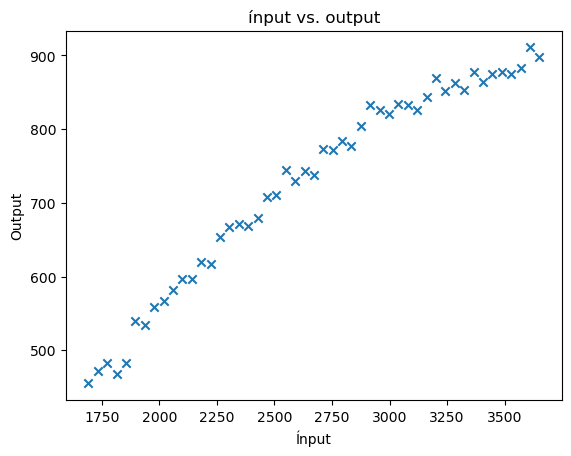

In [65]:
plt.scatter(x,y, marker='x')
plt.xlabel('Ínput')
plt.ylabel('Output')
plt.title('ínput vs. output')
plt.show()

# Split the dataset into training, cross validation, and test sets

In [66]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x,y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (outpot) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (ouput) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (output) is: {y_test.shape}")

the shape of the training set (input) is: (29, 1)
the shape of the training set (outpot) is: (29, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (ouput) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (output) is: (10, 1)


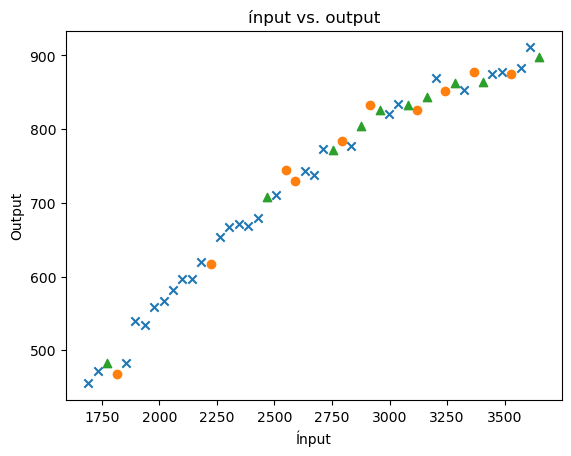

In [67]:
plt.scatter(x_train,y_train, marker='x', label='Training Data')
plt.scatter(x_cv, y_cv, marker='o', label="Cross validation Data")
plt.scatter(x_test, y_test, marker='^', label="Test Data")
plt.xlabel('Ínput')
plt.ylabel('Output')
plt.title('ínput vs. output')
plt.show()

# Feature Scaling

Feature scaling is a good idea to help your model converge faster. This is especially true if your input features hagve widely different ranges of values. 

Later, we will be adding polynomial terms so our inout features will indeed have different ranges. For example, x runs from 1600 to 3600, while $x^2$ will run from 2.56 million to 12.96 million.

We will use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class from scikit-learn. This computes the z-score of your inputs. As a refresher, the z-score is given by the equation:

$$ z = \frac{x - \mu}{\sigma} $$

where $\mu$ is the mean of the feature values and $\sigma$ is the standard deviation. 

The code below shows how to prepare the training set using the said class. You can plot the results again to inspect if it still follows the same pattern as before. The new graph should have a reduced range of values for `x`.


Compute mean of the training set: 2529.25
Compute standard deviation of the training set: 578.48


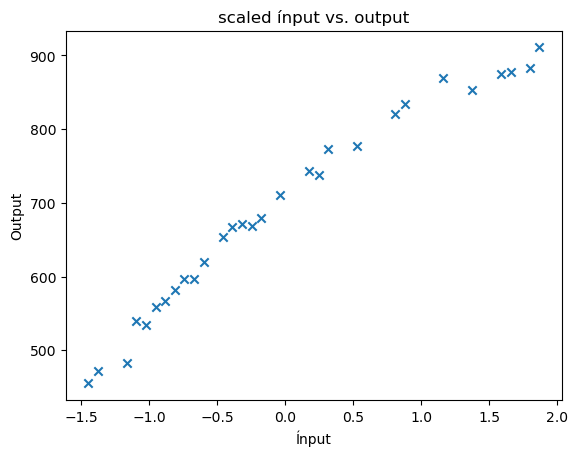

In [68]:
# initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Compute mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Compute standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# plot the results
plt.scatter(X_train_scaled, y_train, marker='x')
plt.xlabel('Ínput')
plt.ylabel('Output')
plt.title('scaled ínput vs. output')
plt.show()

# Train the Model

In [69]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

# Evaluate the Model

To evaluate the performance of your model, you will want to measure the error for the training and cross validation sets. For the training error, recall the equation for calculating the mean squared error (MSE):

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

Scikit-learn also has a built-in [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function that you can use. Take note though that [as per the documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), scikit-learn's implementation only divides by `m` and not `2*m` (where `m` = number of examples). Thus, to match the equation above, you can use the scikit-learn function then divide by two as shown below.

Another thing to take note: since you trained the model on scaled values (i.e. using the z-score), you should also feed in the scaled training set instead of its raw values.

In [70]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE : {mean_squared_error(y_train, yhat)/2}")


training MSE : 333.38146769716116


You can then compute the MSE for the cross validation set with basically the same equation:

$$J_{cv}(\vec{w}, b) = \frac{1}{2m_{cv}}\left[\sum_{i=1}^{m_{cv}}(f_{\vec{w},b}(\vec{x}_{cv}^{(i)}) - y_{cv}^{(i)})^2\right]$$

As with the training set, you will also want to scale the cross validation set. An *important* thing to note when using the z-score is you have to use the mean and standard deviation of the **training set** when scaling the cross validation set. This is to ensure that your input features are transformed as expected by the model. One way to gain intuition is with this scenario:

* Say that your training set has an input feature equal to `500` which is scaled down to `0.5` using the z-score.
* After training, your model is able to accurately map this scaled input `x=0.5` to the target output `y=300`. 
* Now let's say that you deployed this model and one of your users fed it a sample equal to `500`. 
* If you get this input sample's z-score using any other values of the mean and standard deviation, then it might not be scaled to `0.5` and your model will most likely make a wrong prediction (i.e. not equal to `y=300`). 

You will scale the cross validation set below by using the same `StandardScaler` you used earlier but only calling its [`transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform) method instead of [`fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform).

In [71]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation set MSE: {mean_squared_error(y_cv, yhat)/2}")

Mean used to scale the CV set: 2529.25
Standard deviation used to scale the CV set: 578.48
Cross validation set MSE: 634.7853369642162


# Adding Polynomial Features

From the graphs earlier, you may have noticed that the target `y` rises more sharply at smaller values of `x` compared to higher ones. A straight line might not be the best choice because the target `y` seems to flatten out as `x` increases. Now that you have these values of the training and cross validation MSE from the linear model, you can try adding polynomial features to see if you can get a better performance. The code will mostly be the same but with a few extra preprocessing steps. Let's see that below.

### Create the additional features

First, you will generate the polynomial features from your training set. The code below demonstrates how to do this using the [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class. It will create a new input feature which has the squared values of the input `x` (i.e. degree=2).

In [72]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)
print(X_train_mapped[:5])

[[3.32447000e+03 1.10521008e+07]
 [2.38569000e+03 5.69151678e+06]
 [3.48773000e+03 1.21642606e+07]
 [2.67141000e+03 7.13643139e+06]
 [2.63059000e+03 6.92000375e+06]]


You will then scale the inputs as before to narrow down the range of values.

In [73]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
print(X_train_mapped_scaled[:5])

[[ 1.37465326  1.39477637]
 [-0.24817275 -0.33583595]
 [ 1.65687335  1.75382631]
 [ 0.24573833  0.13064065]
 [ 0.17517467  0.0607691 ]]


You can then proceed to train the model. After that, you will measure the model's performance against the cross validation set. Like before, you should make sure to perform the same transformations as you did in the training set. You will add the same number of polynomial features then scale the range of values.

In [74]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train)

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat)/2}")

Training MSE: 54.676446644626836


In [75]:
# Add the polynomial features to the cross validaton set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using mean and standard deviation
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Computer the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE:{mean_squared_error(y_cv, yhat)/2}")

Cross validation MSE:147.2169911297371


You'll notice that the MSEs are significantly better for both the training and cross validation set when you added the 2nd order polynomial. You may want to introduce more polynomial terms and see which one gives the best performance. You can have 10 different models.

You can create a loop that contains all the steps in the previous code cells. Here is one implementation that adds polynomial features up to degree=10. We'll plot it at the end to make it easier to compare the results for each model.

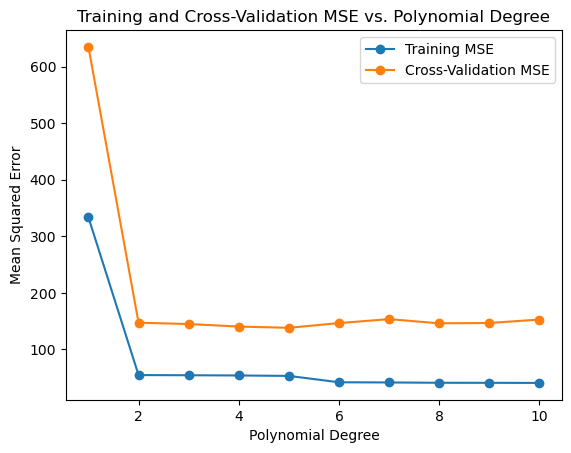

In [76]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train)
    models.append(model)
    
    # computer the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat)/2
    train_mses.append(train_mse)
    
    # Add polynomial features, scale the cross validation error, and compute.
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat)/2
    cv_mses.append(cv_mse)

    
# Plot the results
degrees = np.arange(1,11)

# Plot the MSE values for both the training and cross-validation sets
plt.plot(range(1,11), train_mses, 'o-', label='Training MSE')
plt.plot(range(1,11), cv_mses, 'o-', label='Cross-Validation MSE')

# Add title, labels, and legend
plt.title('Training and Cross-Validation MSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Choosing the best model

When selecting a model, you want to choose one that performs well both on the training and cross validation set. It implies that it is able to learn the patterns from your training set without overfitting.

You must notice a sharp drop in cross validation error from the models with degree=1 to degree=2. This is followed by a relatively flat line up to degree=5. After that, however, the cross validation error is generally getting worse as you add more polynomial features. Given these, you can decide to use the model with the lowest `cv_mse` as the one best suited for your application.

In [77]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=5


You can then publish the generalization error by computing the test set's MSE. As usual, you should transform this data the same way you did with the training and cross validation sets.

In [78]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat)/2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 53.18
Cross Validation MSE: 138.22
Test MSE: 21.37
